#UNI Machine Learning Course
#Lab 06:  Bagging y boosting
## ¿Puede un set de estudiantes débiles crear un solo estudiante fuerte?"  ( Kearns y Valiant)


[Probably Approximately Correct: Nature's Algorithms for Learning and Prospering in a Complex World](https://www.amazon.com/dp/0465060722?tag=inspiredalgor-20)

[Random Multiclass Classification: Generalizing Random Forests to Random MNL and Random NB](https://link.springer.com/chapter/10.1007%2F978-3-540-74469-6_35)


## 1.- Bagging

El algoritmo de bagging (bootstrap aggregating) hace votar a los clasificadores generados por diferentes muestras de bootstrap. Dado el parámetro, que es el número de repeticiones, T, bootstrap ejemplos son generados S1, S2, y, ST. A partir de cada muestra un clasificador es inducido Ci por el mismo algoritmo ML y el clasificador final C* está formado por agregacion de todos los clasificadores. 

##Clasificacion

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

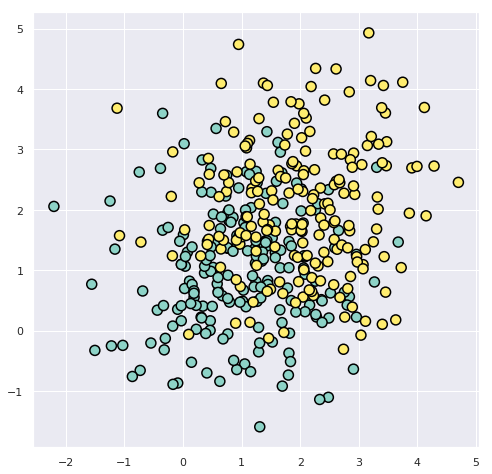

In [0]:
#Generamos muestras de dos clases ambas distribuciones normales pero con diferentes parametros

# clase 0
np.random.seed(2019)
train_data = np.random.normal(size=(200, 2),loc= 1,scale=1)
train_labels = np.zeros(200)

# clase 1
train_data = np.r_[train_data, np.random.normal(size=(200, 2), loc=2,scale=1)]
train_labels = np.r_[train_labels, np.ones(200)]


# Ploteo
plt.figure(figsize=(8,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='Set3', edgecolors='black', linewidth=1.5);


Text(0.5, 1.0, 'Decision trees')

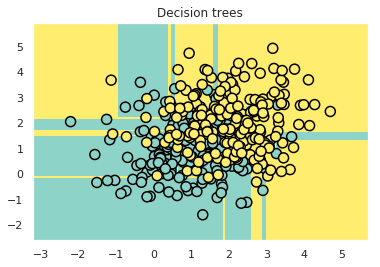

In [0]:
from sklearn.tree import DecisionTreeClassifier

# generando una grid para el DT.
def get_grid(space):
    x_min, x_max = space[:, 0].min() - 1, space[:, 0].max() + 1
    y_min, y_max = space[:, 1].min() - 1, space[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=20)

# training
tree_clf.fit(train_data, train_labels)

# plot la superficie de separacion del DT
x_grid, y_grid = get_grid(train_data)
predicted = tree_clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

plt.pcolormesh(x_grid, y_grid, predicted, cmap='Set3')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='Set3', edgecolors='black', linewidth=1.5);
plt.title("Decision trees")

### Bagging con arboles de decision

Text(0.5, 1.0, 'Bagging (arboles de decision)')

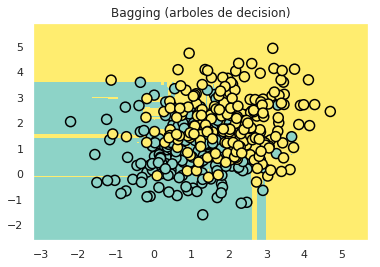

In [0]:
bagging_tree = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300, random_state=21)
bagging_tree.fit(train_data,train_labels)

# plot la superficie de separacion del DT
x_grid, y_grid = get_grid(train_data)
predicted = bagging_tree.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

plt.pcolormesh(x_grid, y_grid, predicted, cmap='Set3')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='Set3', edgecolors='black', linewidth=1.5);
plt.title("Bagging (arboles de decision)")


### Random forest clasificador

Text(0.5, 1.0, 'Random Forest')

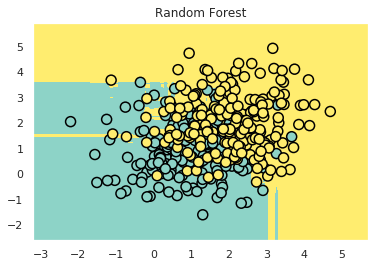

In [0]:
rfC = RandomForestClassifier(n_estimators=300, random_state=21)
rfC.fit(train_data,train_labels)

# plot la superficie de separacion del DT
x_grid, y_grid = get_grid(train_data)
predicted = rfC.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

plt.pcolormesh(x_grid, y_grid, predicted, cmap='Set3')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='Set3', edgecolors='black', linewidth=1.5);
plt.title("Random Forest")

## Regresion

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

Generemos datos distribuidos por una función con ruido.

$\huge f(x) = 4 e^{cos(-x ^ 2)} + 6 sin^2( 2- x)$

In [0]:
n_train = 1000        
n_test = 500       
noise = 0.2

def f(x):
    x = x.ravel()
    return 4*np.exp(np.cos(-x ** 2)) + 6 * np.sin(-(x - 1) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 8-4
    X = np.sort(X).ravel()
    y = f(X) + 5*np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

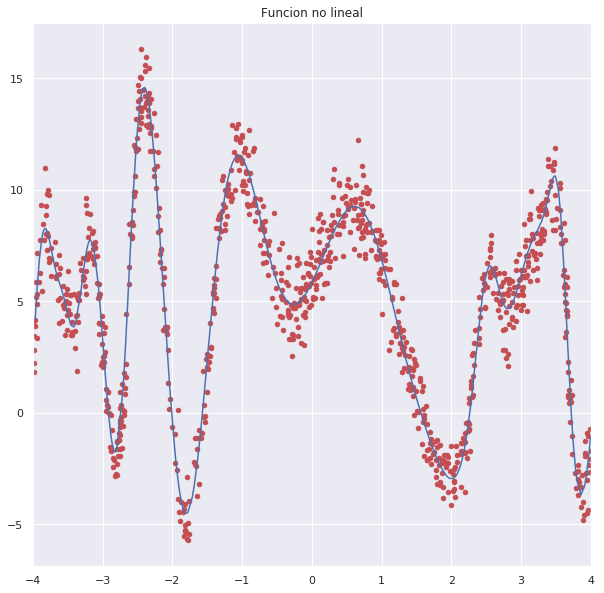

In [0]:
plt.figure(figsize=(10, 10))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="r", s=20)
plt.xlim([-4, 4])
plt.title("Funcion no lineal" )
plt.show()

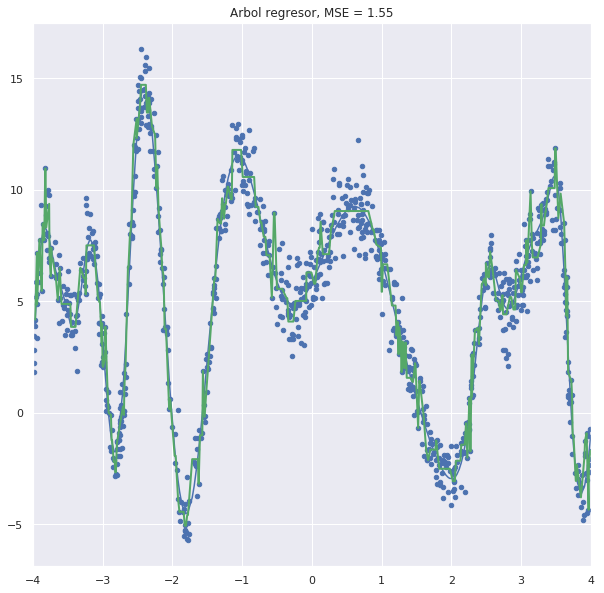

In [0]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=10, random_state=20)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 10))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-4, 4])
plt.title("Arbol regresor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

### Bagging con arboles de decision

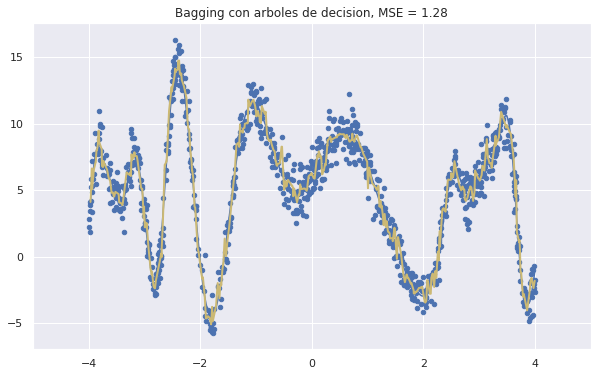

In [0]:
bagging_tree = BaggingRegressor(DecisionTreeRegressor(max_depth=10))
bagging_tree.fit(X_train, y_train)
bagging_tree_pred = bagging_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bagging_tree_pred, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Bagging con arboles de decision, MSE = %.2f" %(np.sum((y_test - bagging_tree_pred) ** 2)/ n_test));                                        

### Random forest regresor

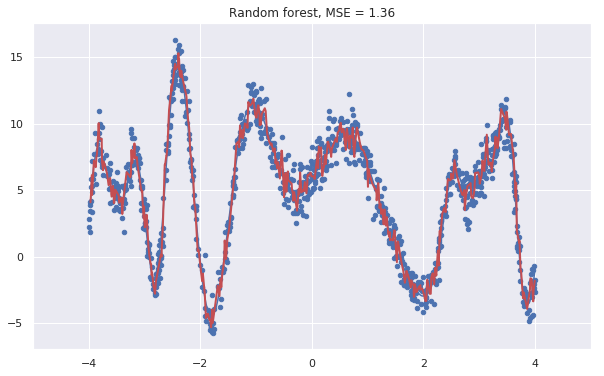

In [0]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_pred, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_pred) ** 2/n_test));

## Aplicacion on real dataset: "Pima Indians Diabetes"

The dataset includes data from 768 women with 8 characteristics, in particular:

Pregnant: Number of times pregnant

Pressure: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

Plasma: Diastolic blood pressure (mm Hg)

Skin: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

Mass: Body mass index (weight in kg/(height in m)^2)

Pedigree: Diabetes pedigree function

Age: (years)

La ultima columna del set de datos indica si la persona ha sido diagnosticada con diabetes (1) o no (0)





**La libreria de scikit-learn** implementa random forest y proporcionar dos estimadores: 

*   RandomForestClassifier
*   RandomForestRegressor.

Para la clasificacion y regresion, los parametros son en su mayoria los mismos.  Durante optimizacion, los parámetros mas importantes para la  construccion de un nuevo modelo son:

*   n_estimators : el numero de arboles;
*   criterio: la función utilizada para medir la calidad de una división;
*   max_features: la cantidad de atributos a considerar cuando se busca la mejor división;
*   min_samples_leaf: el numero minimo de muestras necesarias para estar en un nodo hoja;
*   max_depth: la profundidad maxima del arbol.

In [0]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score


url = 'https://raw.githubusercontent.com/PCL-AI/MT616_2019_1/master/Lab05/pima-indians-diabetes.data.csv'

col = ['Pregnant', 'Plasma', 'Pressure', 'Skin', 'Insulin', 'Mass', 'Pedigree', 'Age', 'Class']

col_x = ['Pregnant', 'Plasma', 'Pressure', 'Skin', 'Insulin', 'Mass', 'Pedigree', 'Age']

df = pd.read_csv(url, names=col)


In [0]:
# Dividir el dataset
X, y = df[col_x].copy(), np.asarray(df["Class"],dtype='int8')

# Preparando para una CV con StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

# Inicializar el clasificador con parametros 
rfC = RandomForestClassifier(random_state=21, n_jobs=-1, oob_score=True)

# Entrenando en el set de entrenamiento
results = cross_val_score(rfC, X, y, cv=skf)

# Evaluar la precision en el set de test
print("presicion con CV (score): {:.2f}%".format(results.mean()*100))

presicion con CV (score): 75.13%


El clasificador tiene una precision mayor a  75%. Ahora se intentara mejorar el resultado graficando las curvas de aprendizaje cuando se cambia los parámetros.

### Optimizando parametros


*   n_estimators : el numero de arboles;
*   max_depth: la profundidad maxima del arbol;
*   min_samples_leaf: el numero minimo de muestras necesarias para estar en un nodo hoja;

In [0]:
# Inicializar el set de validacion
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

# Crear listas para guardar valores de precision en los sets de trainig y test
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [10, 15, 20, 30, 50, 75, 100]

# Entrenar en el training set
for ntrees in trees_grid:
    rfC = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfC.fit(X_train, y_train)
        temp_train_acc.append(rfC.score(X_train, y_train))
        temp_test_acc.append(rfC.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("La mejor presicion con CV es {:.2f}% con {} arboles".format(max(test_acc.mean(axis=1))*100, trees_grid[np.argmax(test_acc.mean(axis=1))]))

La mejor presicion con CV es 76.82% con 75 arboles


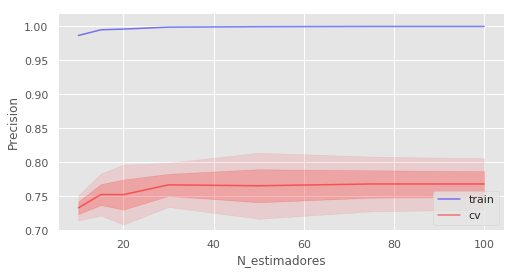

In [0]:
# plotear
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='red', alpha=0.2)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='red', alpha=0.1)
ax.legend(loc='best')
ax.set_ylim([0.7,1.02])
ax.set_ylabel("Precision")
ax.set_xlabel("N_estimadores");

Best accuracy on CV is 76.82% with 22 max_depth


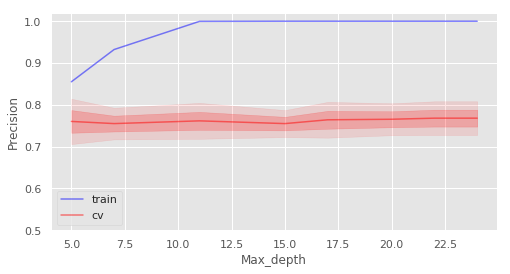

In [0]:
# Crear listas para guardar valores de precision en los sets de trainig y test
train_acc = []
test_acc = []

temp_train_acc = []
temp_test_acc = []

# Paramentro a variar
max_depth_grid = [5, 7, 11, 15, 17, 20, 22, 24]

# Entrenar en el training set
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=75, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100,max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

# plotear
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='red', alpha=0.2)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='red', alpha=0.1)
ax.legend(loc='best')
ax.set_ylim([0.5,1.02])
ax.set_ylabel("Precision")
ax.set_xlabel("Max_depth");

Best accuracy on CV is 76.82% with 1 min_samples_leaf


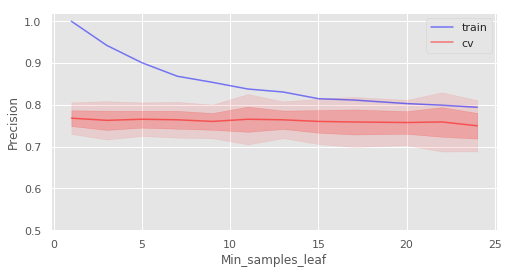

In [0]:
# Crear listas para guardar valores de precision en los sets de trainig y test
train_acc = []
test_acc = []

temp_train_acc = []
temp_test_acc = []

# parametro a variar
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Entrenar en el training set
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100,min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

# plotear
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='red', alpha=0.2)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='red', alpha=0.1)
ax.legend(loc='best')
ax.set_ylim([0.5,1.02])
ax.set_ylabel("Precision")
ax.set_xlabel("Min_samples_leaf");

In [0]:
# Inicializar el set de parametros para buscar los parametros optimos.
parameters = {'max_features': [1, 3, 7, 8], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}

rfC = RandomForestClassifier(n_estimators=75, random_state=21,n_jobs=-1, oob_score=True)
GS_CV = GridSearchCV(rfC, parameters, n_jobs=-1, cv=skf, verbose=1)
GS_CV.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   51.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=21, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=75, n_jobs=-1,
                                              oob_score=True, random_state=21,
                                              verbose=0, warm_start=False),
 

In [0]:
GS_CV.best_estimator_, GS_CV.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=5, max_features=3, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=5, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
                        oob_score=True, random_state=21, verbose=0,
                        warm_start=False), 0.765625)

 1) Plasma                         0.432652
 2) Mass                           0.173133
 3) Age                            0.152168
 4) Pedigree                       0.066198
 5) Insulin                        0.057200
 6) Pregnant                       0.051368
 7) Pressure                       0.035786
 8) Skin                           0.031495


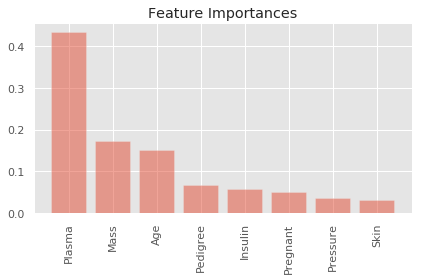

In [0]:
best_rfC = GS_CV.best_estimator_

importances = best_rfC.feature_importances_
# ordenar los indices de forma descendente
indices = np.argsort(importances)[::-1]

for col in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (col + 1, 30,X.columns.values[indices[col]],importances[indices[col]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],align='center',alpha=0.5)

plt.xticks(range(X_train.shape[1]),X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

## 2. Boosting
Boosting es un algoritmo de machine learning para reducir principalmente el bias y la varianza en el aprendizaje supervisado, y una familia de algoritmos de ML que convierten a los aprendices debiles en fuertes. Si bien el boosting no está restringido algorítmicamente, la mayoría de los algoritmos de boosting consisten en aprender iterativamente clasificadores débiles con respecto a una distribución y agregarlos a un clasificador final que es fuerte. Cuando se agregan, por lo general se ponderan de alguna manera que generalmente está relacionada con la precisión de los alumnos débiles. Los datos de entrada mal clasificados ganan un mayor peso y los ejemplos que se clasifican pierden peso correctamente. Por lo tanto, los futuros alumnos débiles se centran más en los ejemplos que los alumnos débiles anteriores clasificaron incorrectamente.

La idea es utilizar el método de aprendizaje débil varias veces para obtener una sucesión de hipótesis, cada una de ellas centrada en los ejemplos que las anteriores  clasificaron mal.

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
url = 'https://raw.githubusercontent.com/PCL-AI/MT616_2019_1/master/Lab05/pima-indians-diabetes.data.csv'

col = ['Pregnant', 'Plasma', 'Pressure', 'Skin', 'Insulin', 'Mass', 'Pedigree', 'Age', 'Class']

col_x = ['Pregnant', 'Plasma', 'Pressure', 'Skin', 'Insulin', 'Mass', 'Pedigree', 'Age']

df = pd.read_csv(url, names=col)

X = df[col_x]

# Select target
y = df.Class

# Separate data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X, y)


In [0]:
##from xgboost import XGBRegressor
import xgboost as xgb

my_model = xgb.XGBClassifier()
#my_model.fit(X_train, y_train)
my_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

predictions = my_model.predict(X_test)
print("presicion con CV (score): {:.2f}%" .format(accuracy_score(predictions, y_test)*100))


presicion con CV (score): 88.24%


## Optimizacion de parametros

[XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html) tiene algunos parametros que pueden afectar dramaticamente la precision y la velocidad de entrenamiento. Los primeros parametros que debes entender son:


**n_estimators:** especifica cuántas veces debe pasar por el ciclo de modelado descrito anteriormente. Es igual al número de modelos que incluimos en el set. Un valor demasiado bajo causa underfitting y un valor demasiado grande causa un overfitting. Los valores típicos varían de 100 a 1000, aunque esto depende mucho del parámetro learning_rate.

**learning_rate:** en lugar de obtener predicciones  sumando las predicciones de cada modelo del set, podemos multiplicar cada prediccion de cada modelo por un número pequeño (learning_rate) antes de agregarlas y de esta forma cada arbol agregados al set influye menos. Por lo tanto, se puede establecer un valor alto par n_estimators sin llegar al overfitting. Si utilizamos la parada temprana (early_stopping_rounds) , el número apropiado de arboles se determinara automaticamente.

En general, una pequena learning_rate y un gran numero de n_estimators produciran modelos XGBoost mas precisos, aunque también llevara mas tiempo entrenar al modelo, ya que realiza mas iteraciones a lo largo del ciclo. 

In [0]:
# Inicializar el clasificador con parametros 
#gbC = XGBRegressor(n_estimators=1000, learning_rate=0.05)

from sklearn.metrics import roc_auc_score

gbC = xgb.XGBClassifier(max_depth =7, n_estimators=1000,learning_rate=0.5,colsample_bytree=0.2,min_child_weight = 3,seed=21)

xgb_param = gbC.get_xgb_params()
           
##gbC.fit(X_train, y_train,early_stopping_rounds=5, eval_set=[(X_valid, y_valid)],verbose=False)


## Haciendo CV para XGB
xgtrainMatrix = xgb.DMatrix(data=X, label=y)
cvresult = xgb.cv(xgb_param, xgtrainMatrix, num_boost_round=5000, nfold=10, early_stopping_rounds=100, stratified=True, seed=21)

#print(cvresult.info)
print('Best number of trees = {}'.format(cvresult.shape[0]))
gbC.set_params(n_estimators=cvresult.shape[0])

# Ajustando la training data
gbC.fit(X, y, eval_metric='error')


predictions = gbC.predict(X_test)
print("presicion con CV (score): {:.2f}%" .format(accuracy_score(predictions, y_test)*100))

Best number of trees = 41
presicion con CV (score): 91.50%


## Tarea
###Primera Parte
1. Explicar por que bagging rinde muy pobre comparado con el bossting en el dataset "Pima Indians Diabetes" **Hint: hacer un EDA al dataset**
2. Hacer una optimizacion para encontrar el valor optimo del  **learning_rate**  y **colsample_bytree** para una precision mayor de 95% mostrando las curvas de aprendizaje para el el dataset "Pima Indians Diabetes".

In [0]:
## Escribir codigo
# Inicializar el set de parametros para buscar los parametros optimos.


##Segunda Parte
## Revisando: La contaminación ambiental por partículas (Particulate pollution)
Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating

La contaminación de partículas, también llamada particulate matter (PM), es una mezcla de sólidos y gotas de líquido que flotan en el aire. PM2.5 se refiere a particulas que tiene un diámetro menor que 2.5 micrómetros y que es aproximadamente el 3% del diámetro de un cabello humano. Las partículas menores o iguales a 10 micrómetros de diámetro son tan pequeñas que pueden ingresar a los pulmones, lo que podría causar serios problemas de salud. Las lecturas de PM2.5 se incluyen en los informes de calidad del aire de las autoridades ambientales y las empresas.

## Dataset
En esta tarea, debe entrenar los modelos de regresión en el set de datos de [Beijing PM2.5](http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data#).

 Este conjunto de datos por hora contiene los datos de PM2.5 de la Embajada de USA en Beijing. También se incluyen los datos meteorológicos del Aeropuerto Internacional de Pekín.

*  **No**: row number
*  ** year**: year of data in this row
*  ** month**: month of data in this row
*   **day**: day of data in this row
*   **hour**: hour of data in this row
*   **pm2.5**: PM2.5 concentration (ug/m^3)
*   **DEWP**: Dew Point (â„ƒ)
*   **TEMP**: Temperature (â„ƒ)
*   **PRES**: Pressure (hPa)
*   **cbwd**: Combined wind direction
*   **Iws**: Cumulated wind speed (m/s)
*   **Is**: Cumulated hours of snow
*   **Ir**: Cumulated hours of rain 

## Pregunta  : ¿Random Forest o Gradient boosting predice mejor el PM2.5?
## Puedes encontrar muy informatativa el siguiente articulo

https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

https://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv', sep=',')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000
